In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Q.1 Perform Principal component analysis and perform clustering using first 3 principal component scores (Using both heirarchial and k mean clustering (scree plot or elbow curve)
Obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining which shows that it has 3 clusters)

## Exploratory Data Analysis

In [4]:
wine=pd.read_csv('wine.csv')

In [5]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.shape

(178, 14)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
wine['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [13]:
wine.Type.unique()

array([1, 2, 3])

In [14]:
wine1 = wine.drop("Type",axis=1)

In [15]:
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
wine1.shape

(178, 13)

In [20]:
wine1[wine1.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


### Checking for the outliers in the dataset using Boxplot

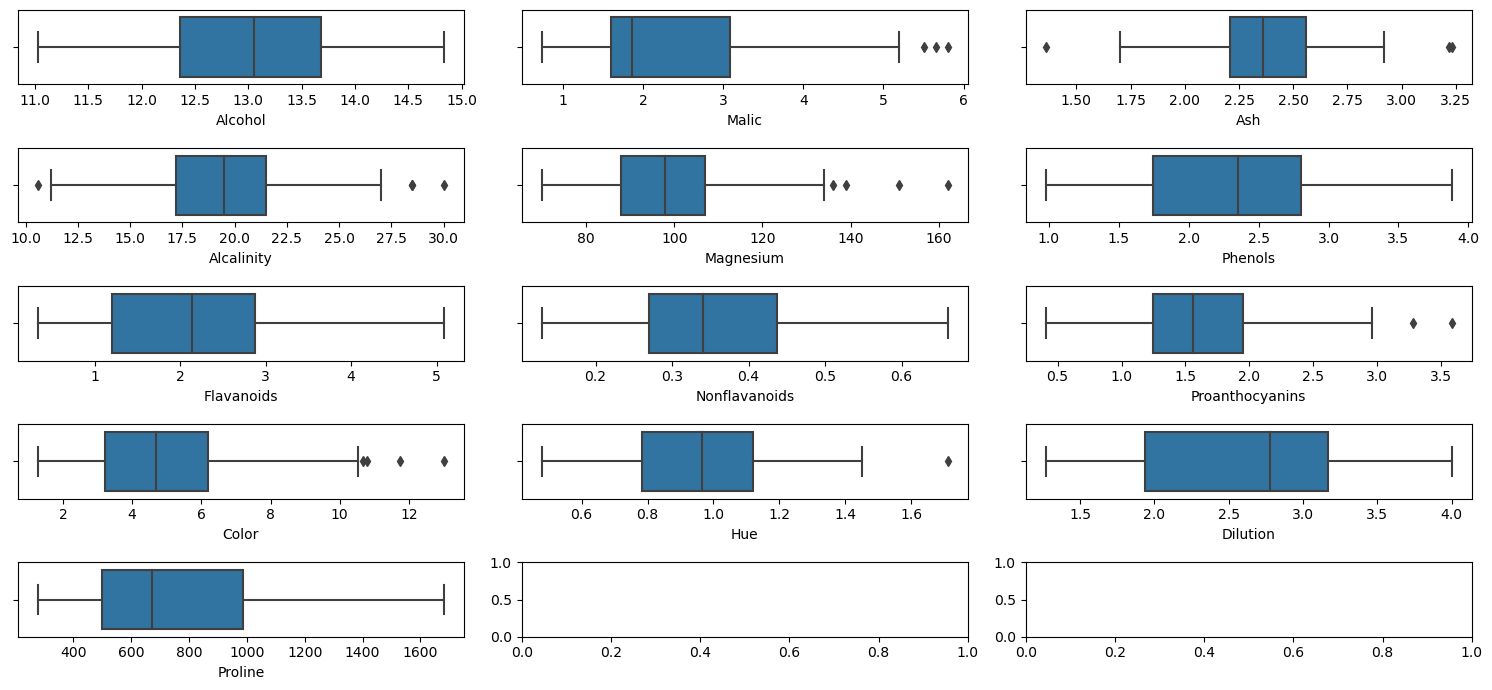

In [21]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.boxplot(wine1.Alcohol,ax=ax[0,0])
sns.boxplot(wine1.Malic,ax=ax[0,1])
sns.boxplot(wine1.Ash,ax=ax[0,2])
sns.boxplot(wine1.Alcalinity,ax=ax[1,0])
sns.boxplot(wine1.Magnesium,ax=ax[1,1])
sns.boxplot(wine1.Phenols,ax=ax[1,2])
sns.boxplot(wine1.Flavanoids,ax=ax[2,0])
sns.boxplot(wine1.Nonflavanoids,ax=ax[2,1])
sns.boxplot(wine1.Proanthocyanins,ax=ax[2,2])
sns.boxplot(wine1.Color,ax=ax[3,0])
sns.boxplot(wine1.Hue,ax=ax[3,1])
sns.boxplot(wine1.Dilution,ax=ax[3,2])
sns.boxplot(wine1.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

### Cheking if the data is normally distributed using distplot

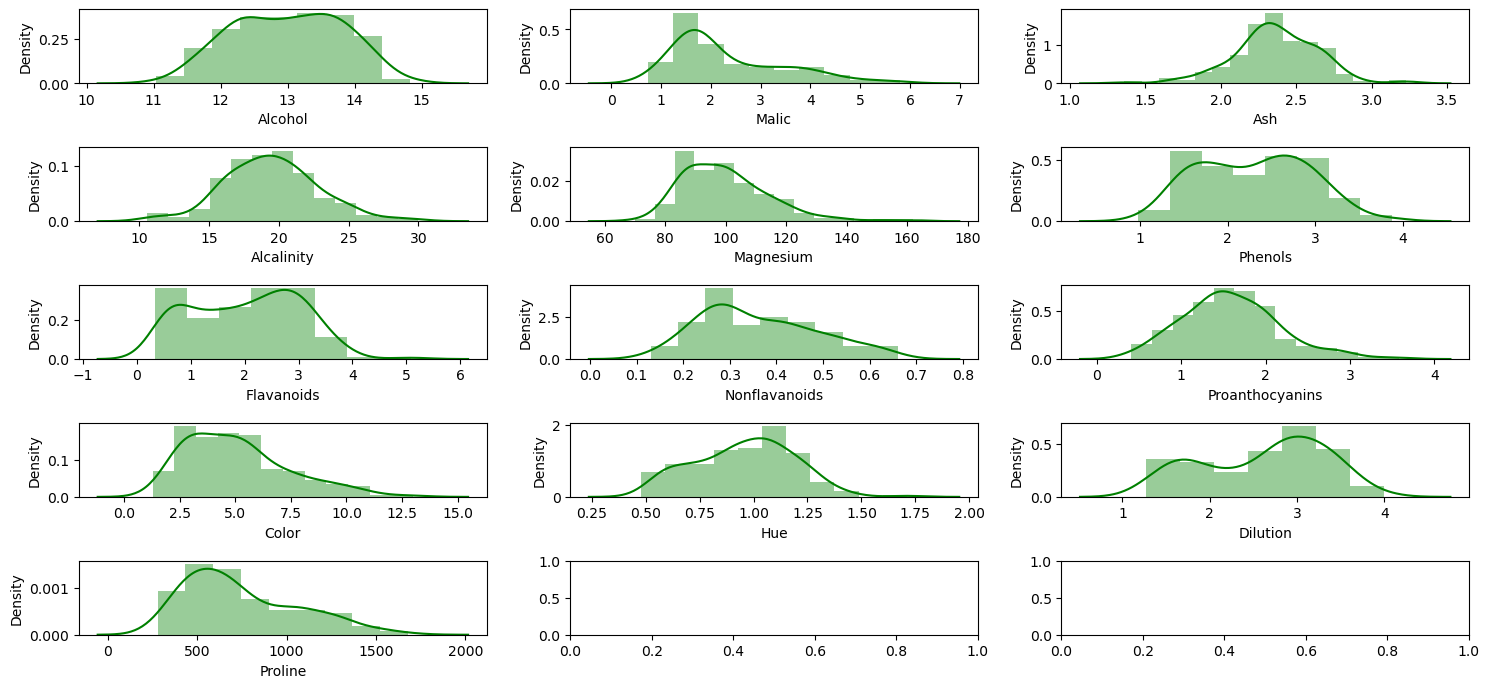

In [23]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.distplot(wine1.Alcohol,ax=ax[0,0],color='g')
sns.distplot(wine1.Malic,ax=ax[0,1],color='g')
sns.distplot(wine1.Ash,ax=ax[0,2],color='g')
sns.distplot(wine1.Alcalinity,ax=ax[1,0],color='g')
sns.distplot(wine1.Magnesium,ax=ax[1,1],color='g')
sns.distplot(wine1.Phenols,ax=ax[1,2],color='g')
sns.distplot(wine1.Flavanoids,ax=ax[2,0],color='g')
sns.distplot(wine1.Nonflavanoids,ax=ax[2,1],color='g')
sns.distplot(wine1.Proanthocyanins,ax=ax[2,2],color='g')
sns.distplot(wine1.Color,ax=ax[3,0],color='g')
sns.distplot(wine1.Hue,ax=ax[3,1],color='g')
sns.distplot(wine1.Dilution,ax=ax[3,2],color='g')
sns.distplot(wine1.Proline,ax=ax[4,0],color='g')
plt.tight_layout()
plt.show()

### Normalizing the numerical data before clustering, to avoid variance in the data

In [63]:
wine1_normal = scale(wine1)

In [64]:
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### We will first apply different type of clustering methods on the dataset without performing PCA and see the inference regarding clustering

Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

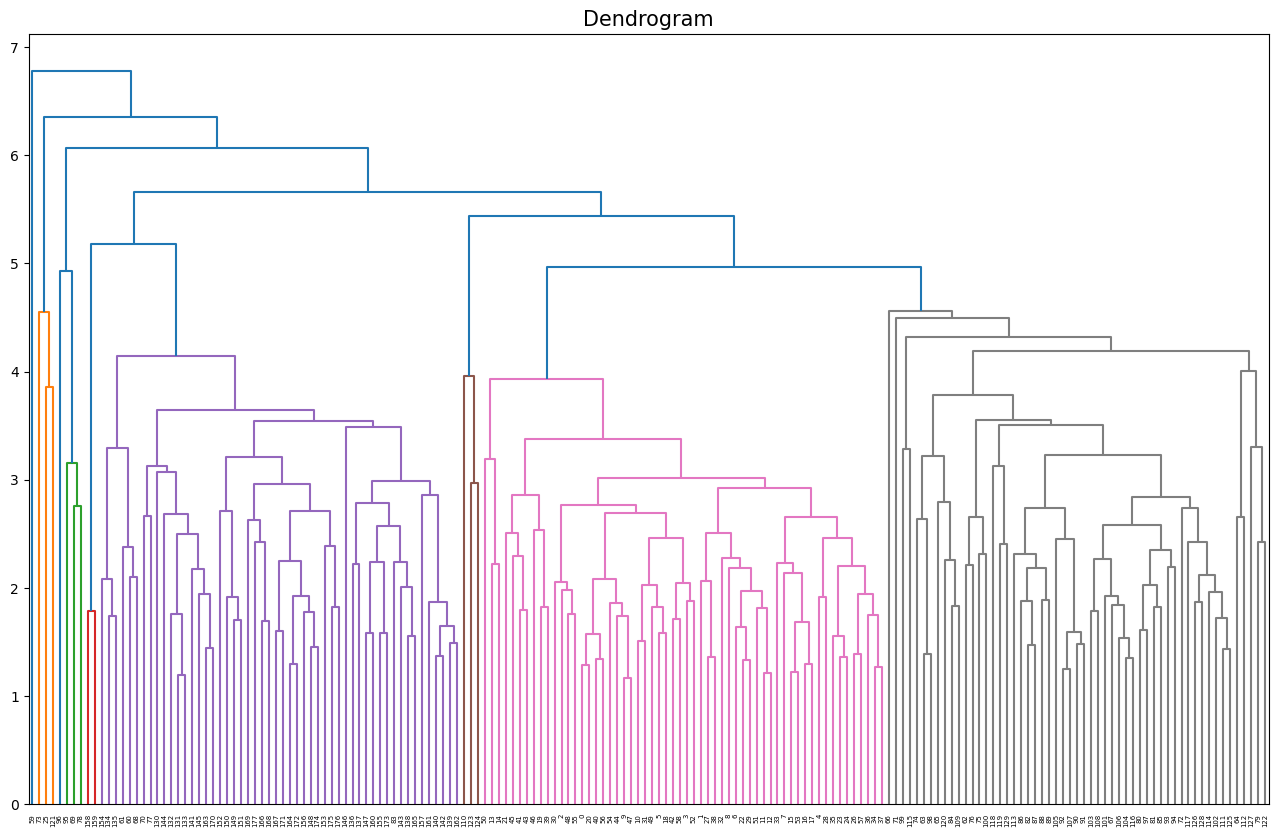

In [67]:
fig=plt.figure(figsize=(16,10))
dendrogram= sch.dendrogram(sch.linkage(wine1_normal,method='average'))
plt.title("Dendrogram",size=15)

In [68]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

Fitting the data on the hierarchial model that is created

In [69]:
y_hc1 = hc1.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [87]:
wine['cluster1'] = y_hc1

In [88]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster1'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



Applying complete linakge method, in hierrachial clustering

Text(0.5, 1.0, 'Dendrogram')

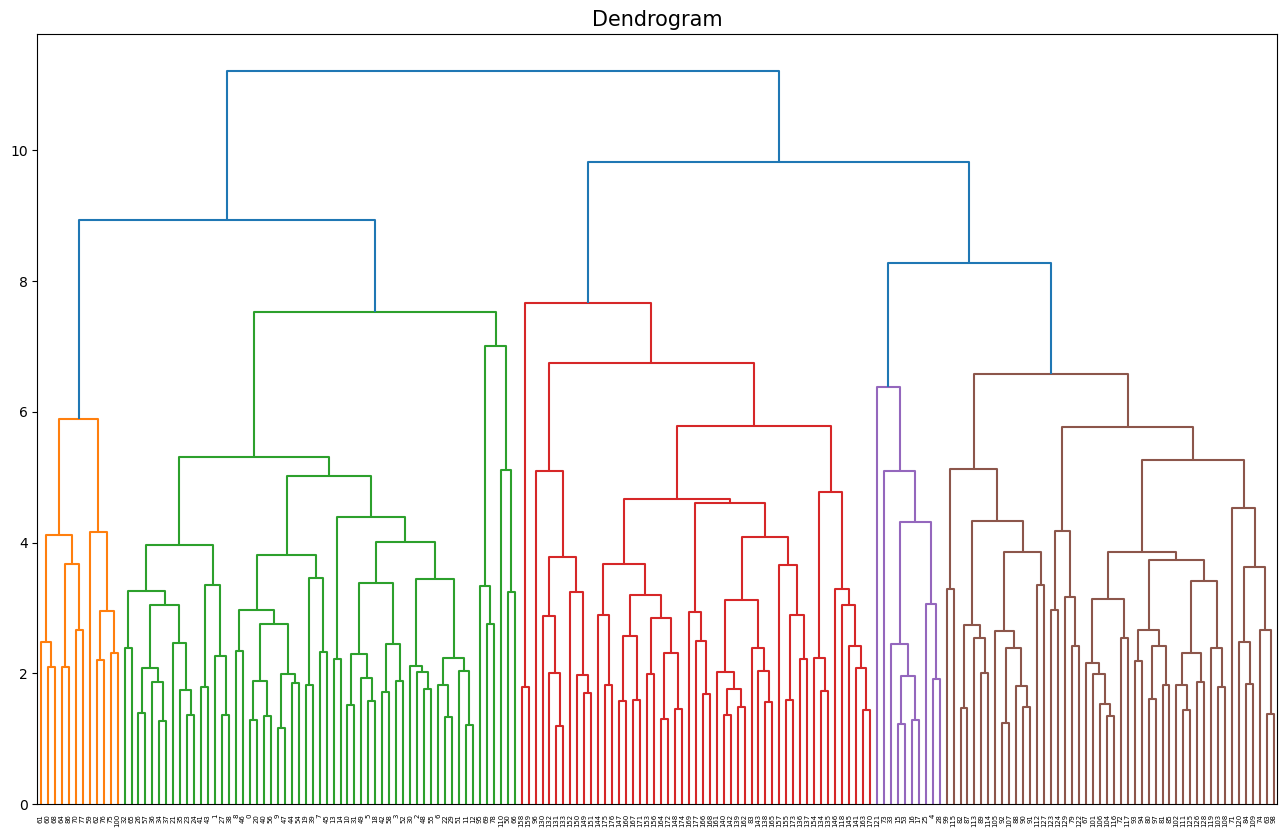

In [72]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='complete'))
plt.title("Dendrogram",size=15)

In [73]:
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [74]:
y_hc2 = hc2.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [89]:
wine['cluster2'] = y_hc2

In [90]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster2'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 57

cluster 2
Total Members: 51

cluster 3
Total Members: 12



Applying centroid (ward) linakge method, in hierarchial clustering

Text(0.5, 1.0, 'Dendrogram')

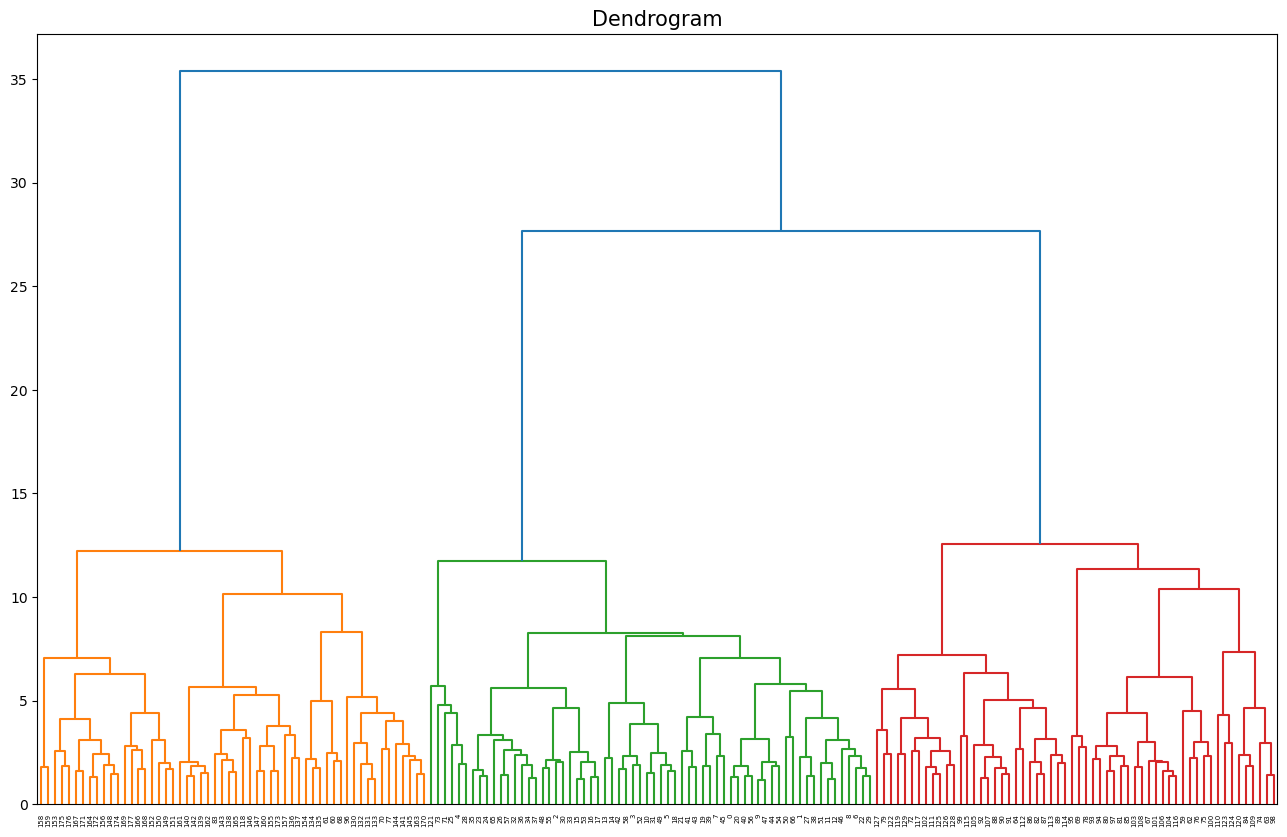

In [77]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='ward'))
plt.title("Dendrogram",size=15)

In [78]:
hc3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [79]:
y_hc3 = hc3.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [91]:
wine['cluster3'] = y_hc3

In [92]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster3'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

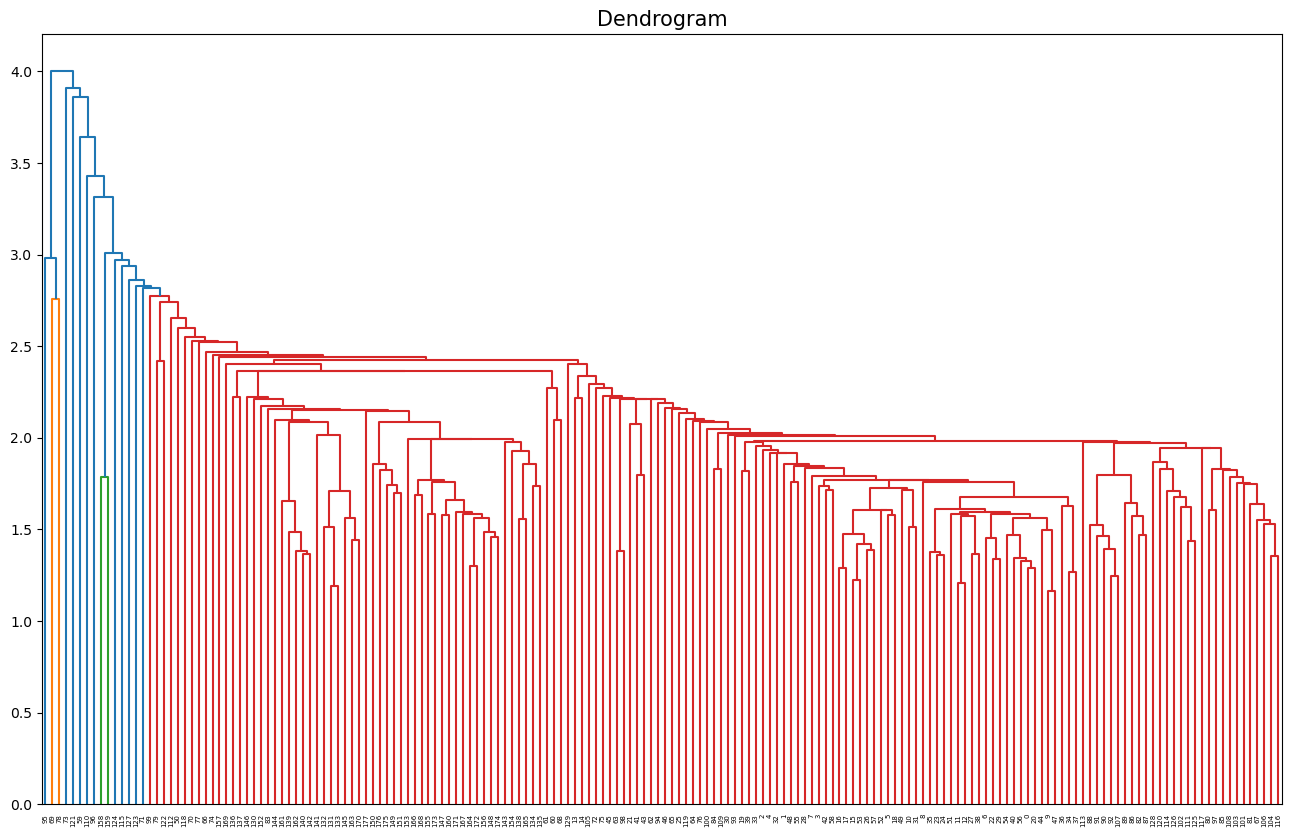

In [82]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='single'))
plt.title("Dendrogram",size=15)

In [83]:
hc4 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [84]:
y_hc4 = hc4.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [93]:
wine['cluster4'] = y_hc4

In [94]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster4'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 175

cluster 1
Total Members: 3



### Applying Kmeans clustering on the dataset to compare the results

In [95]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(wine1_normal)
    wcss.append(km.inertia_)

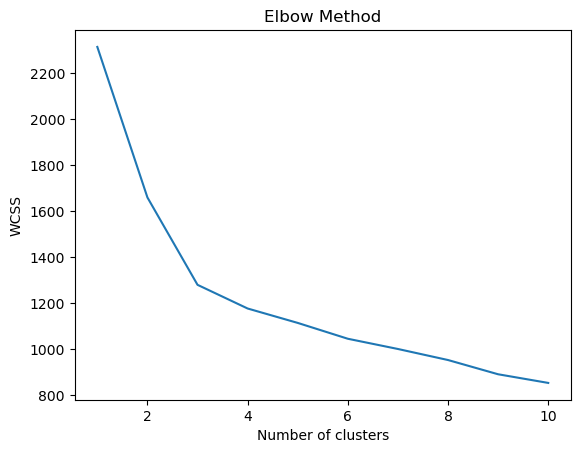

In [96]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
k3 = KMeans(3, random_state=42)
k3.fit(wine1_normal)

KMeans(n_clusters=3, random_state=42)

In [98]:
wine['cluster'] = k3.labels_

In [99]:
k3.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [100]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



##### Calculate the silhouette score for all clustering

In [101]:
SH_average=metrics.silhouette_score(wine1_normal,y_hc1)
SH_average

0.22945756295901437

In [102]:
SH_Ward=metrics.silhouette_score(wine1_normal,y_hc2)
SH_Ward

0.19382526203175696

In [103]:
SH_Complete=metrics.silhouette_score(wine1_normal,y_hc3)
SH_Complete

0.2774439826952266

In [104]:
SH_Single=metrics.silhouette_score(wine1_normal,y_hc4)
SH_Single

0.22245060727650925

In [105]:
SH_Kmeans=metrics.silhouette_score(wine1_normal,k3.labels_)
SH_Kmeans

0.28485891918989864

In [107]:
t={'Model':pd.Series(['average','Ward','Complete','Single','Kmeans']),
  'Silhouette score':[SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans]
  }
t=pd.DataFrame(t)
t

,Model,Silhouette score
0,average,0.229458
1,Ward,0.193825
2,Complete,0.277444
3,Single,0.222451
4,Kmeans,0.284859


### Now we perform the PCA on the normalized data

In [135]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine1_normal)

In [136]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [137]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Cumulative variance

In [138]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [139]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

### Plotting the cumulative variance

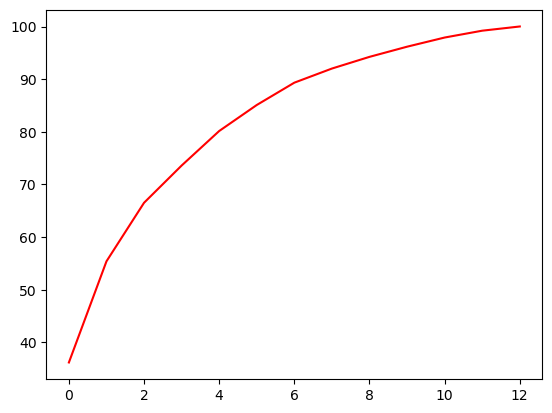

In [140]:
plt.plot(var1,color="red")

## Taking PCA with just three components

In [141]:
wine_pca=pca_values[:,0:3]

#### Now, creating the cluster by using first 3 PCs


Text(0.5, 1.0, 'Dendrogram')

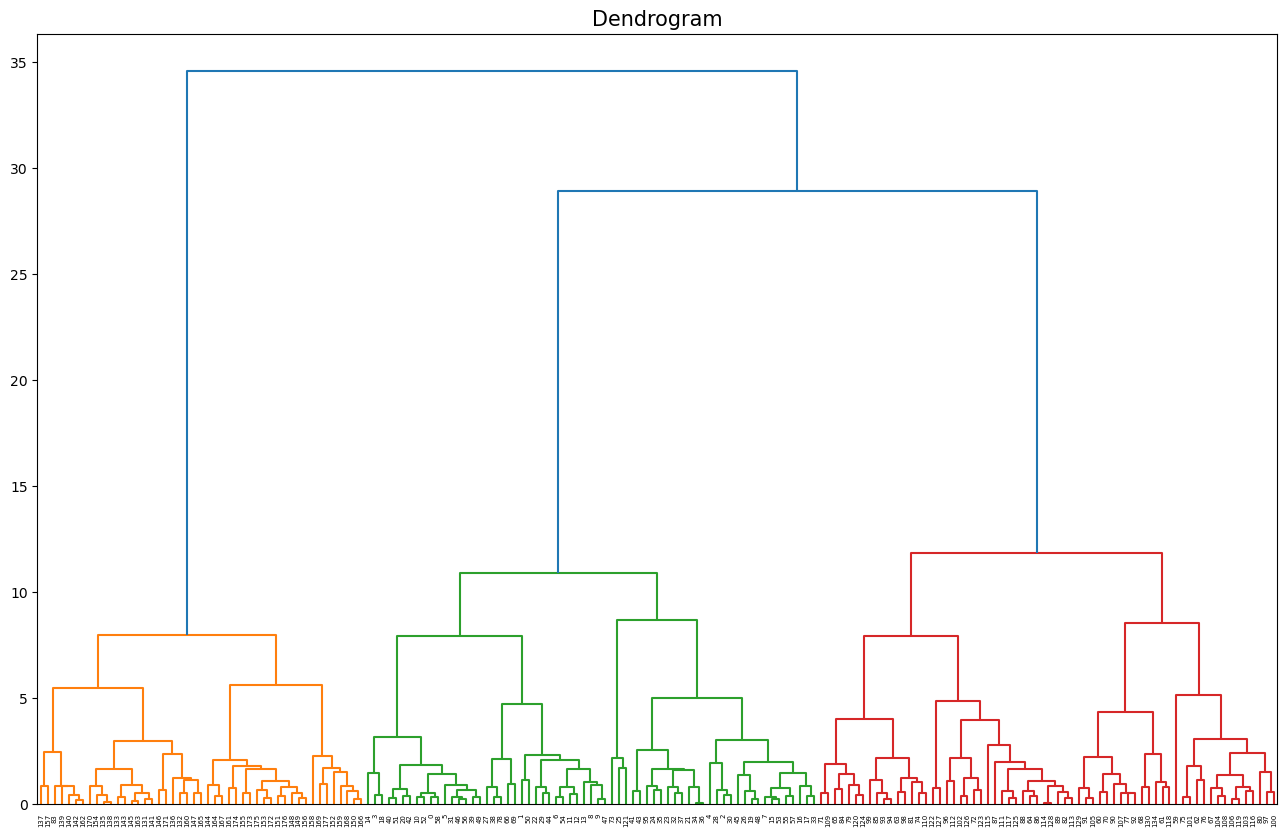

In [142]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='ward'))
plt.title("Dendrogram",size=15)

In [143]:
hc1_pc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [144]:
y_hc1p = hc1_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc1p,columns=['Clusters'])

In [145]:
wine['cluster'] = y_hc1p

#### Viewing the number of wine categories in each cluster


In [146]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



#### Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

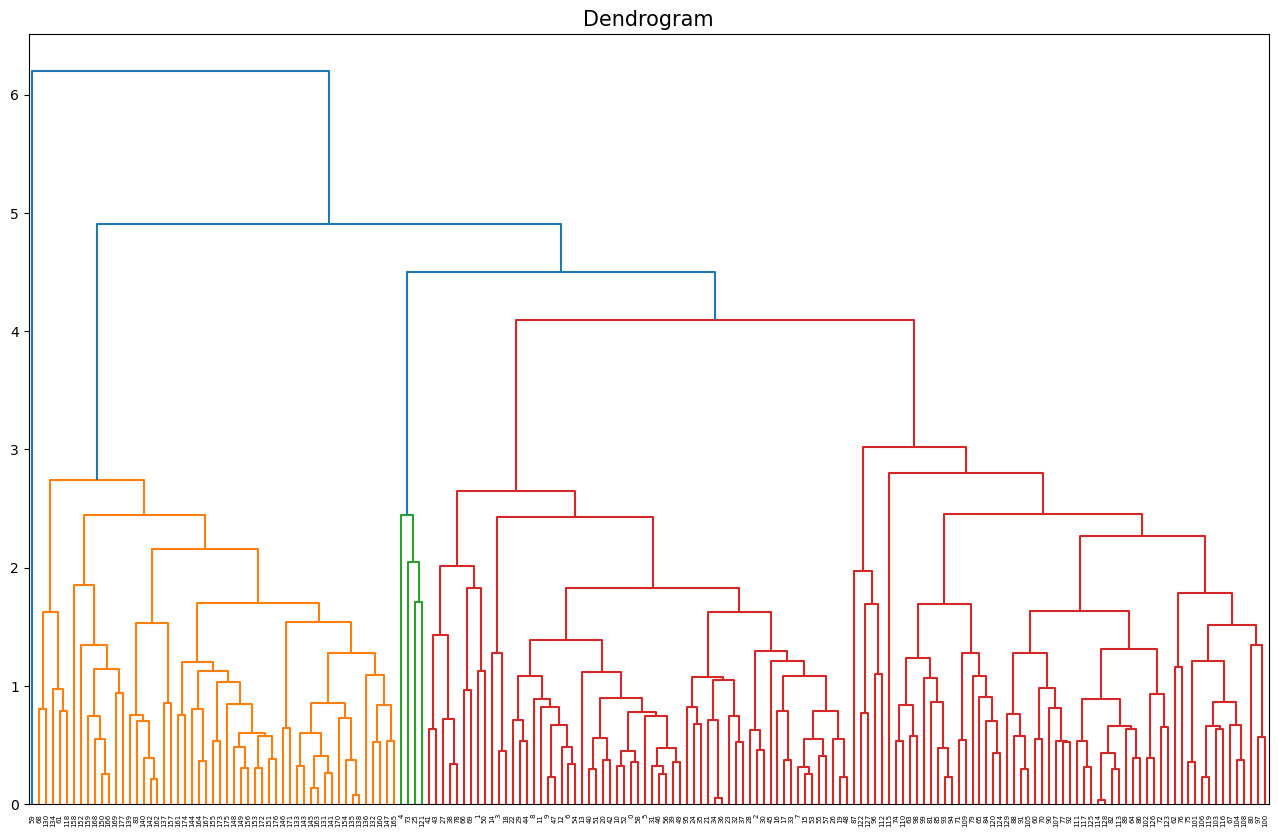

In [147]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='average'))
plt.title("Dendrogram",size=15)

In [148]:
hc2_pc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [149]:
y_hc2p = hc2_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc2p,columns=['Clusters'])

In [150]:
wine['cluster'] = y_hc2p

In [151]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()


cluster 0
Total Members: 60

cluster 1
Total Members: 61

cluster 2
Total Members: 52

cluster 3
Total Members: 1

cluster 4
Total Members: 4



### Applying complete linakge method

Text(0.5, 1.0, 'Dendrogram')

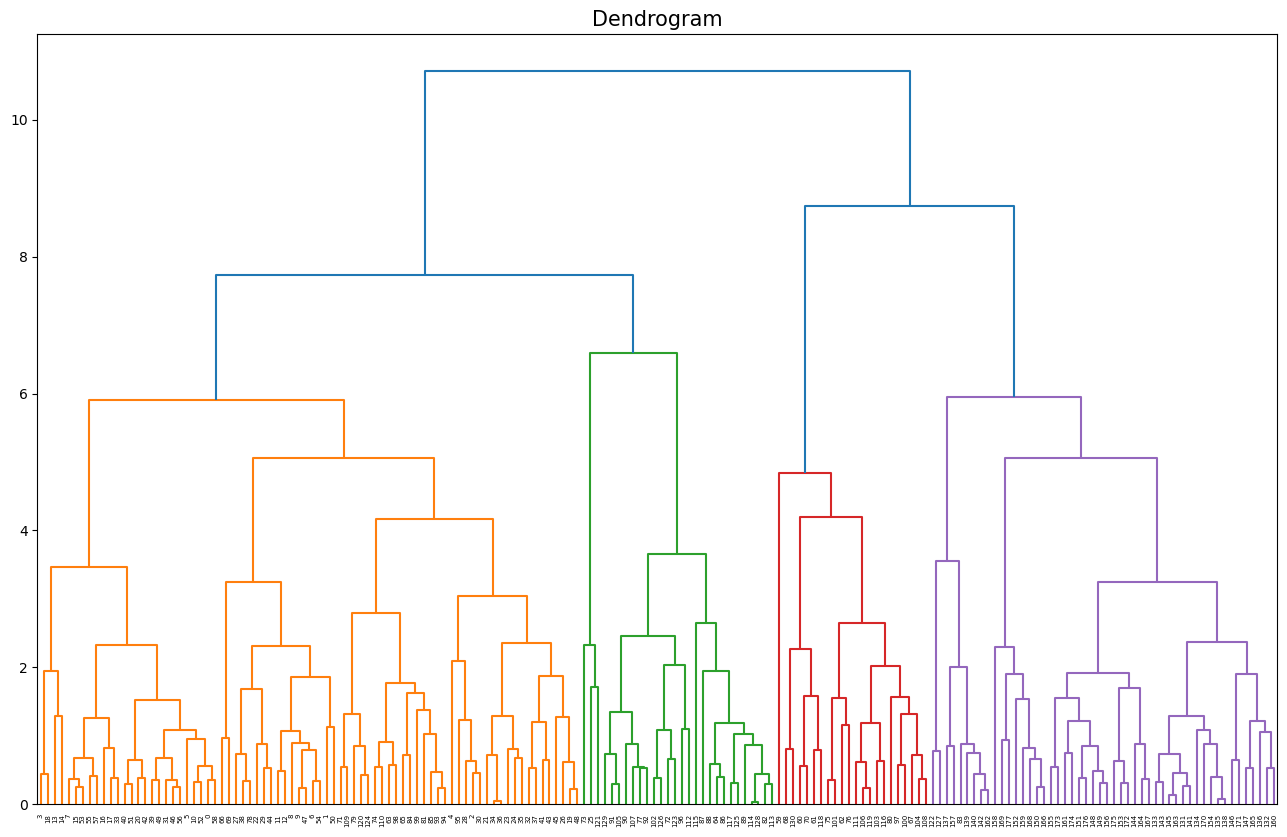

In [169]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='complete'))
plt.title("Dendrogram",size=15)

In [170]:
hc3_pc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [171]:
y_hc3p = hc3_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc3p,columns=['Clusters'])

In [172]:
wine['cluster'] = y_hc3p

In [173]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 28

cluster 1
Total Members: 50

cluster 2
Total Members: 22

cluster 3
Total Members: 78



### Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

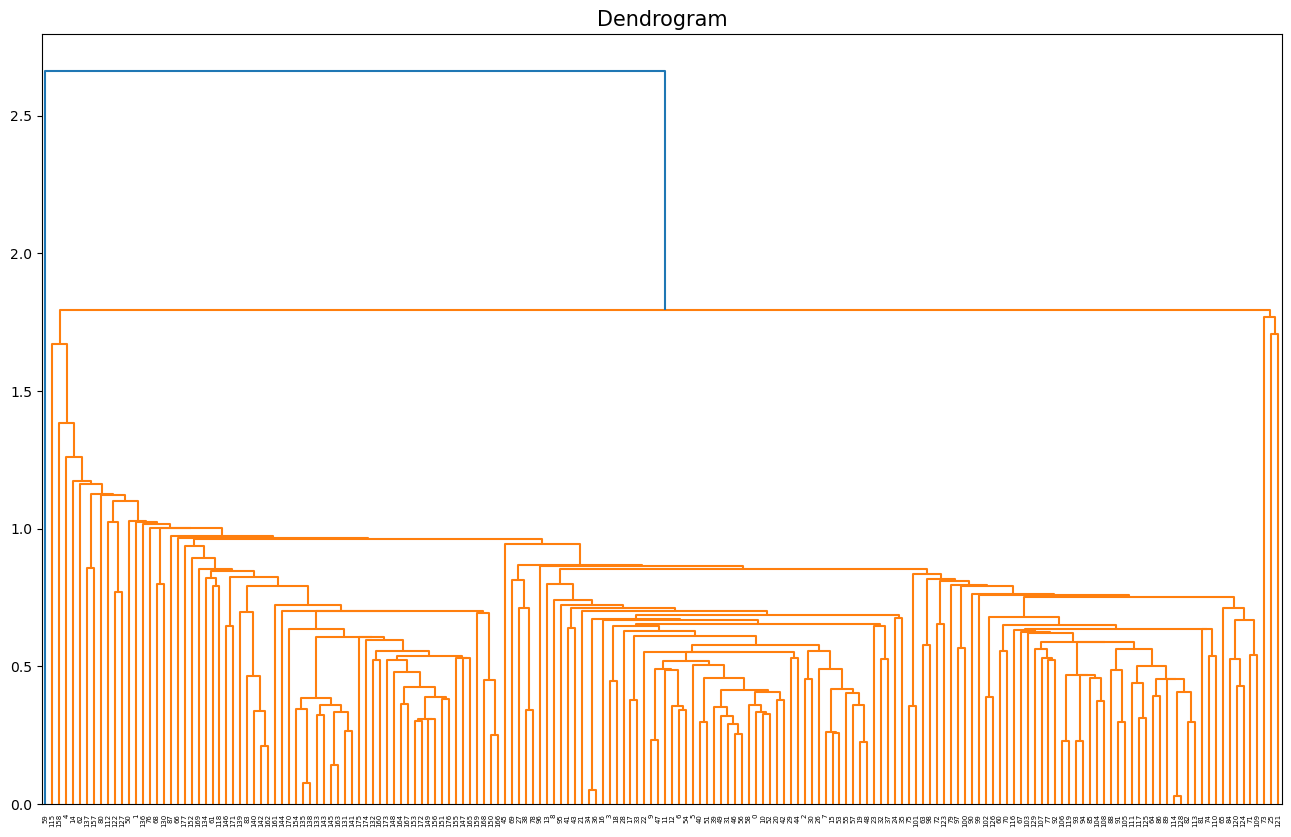

In [152]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='single'))
plt.title("Dendrogram",size=15)

In [153]:
hc4_pc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [154]:
y_hc4p = hc4_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc4p,columns=['Clusters'])

In [156]:
wine['cluster'] = y_hc4p

In [157]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 177

cluster 1
Total Members: 1



# Applying kmeans clustering

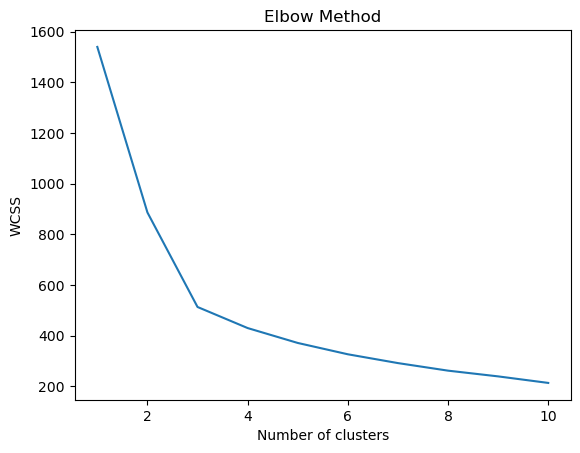

In [158]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [159]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_pca)

KMeans(n_clusters=3, random_state=42)

In [162]:
KM_pca=clusters_new.labels_

In [163]:
wine['cluster'] = clusters_new.labels_

In [164]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [165]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



### Calculating the silhouette score on the pca clusters

In [166]:
ward_PCA=metrics.silhouette_score(wine_pca,y_hc1p)
ward_PCA

0.44594921980629704

In [167]:
average_PCA=metrics.silhouette_score(wine_pca,y_hc2p)
average_PCA

0.4465449278023583

In [174]:
complete_PCA=metrics.silhouette_score(wine_pca,y_hc3p)
complete_PCA

0.35784842685673063

In [175]:
single_PCA=metrics.silhouette_score(wine_pca,y_hc4p)
single_PCA

0.36310673051041414

In [176]:
kmeans_PCA=metrics.silhouette_score(wine_pca,KM_pca_label)
kmeans_PCA

0.4537999848257617

In [183]:
t={'Model':pd.Series(['SH_average','SH_Ward','SH_Complete','SH_Single','SH_Kmeans']),
  'silhouette score':[SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans],
   'Model_pca':['SH_ward_PCA','SH_average_PCA','SH_complete_PCA','SH_single_PCA','SH_kmeans_PCA'],
   'PCA Silhouette score ':[ward_PCA,average_PCA,complete_PCA,single_PCA,kmeans_PCA]
  }
t=pd.DataFrame(t)
t

,Model,silhouette score,Model_pca,PCA Silhouette score
0,SH_average,0.229458,SH_ward_PCA,0.445949
1,SH_Ward,0.193825,SH_average_PCA,0.446545
2,SH_Complete,0.277444,SH_complete_PCA,0.357848
3,SH_Single,0.222451,SH_single_PCA,0.363107
4,SH_Kmeans,0.284859,SH_kmeans_PCA,0.453800
